<a href="https://colab.research.google.com/github/sindetisarah/Project--AI-DataAnalysis/blob/project/Sarah_Sindet_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sarah Sindet Final Project

In this project I will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. I am finally trying to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad



## Get the Data
**Reading in the advertising.csv file and setting it to a data frame called ad_data.**

In [2]:
# prompt: ## Get the Data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

ad_data = pd.read_csv('advertising.csv')


**Check the head of ad_data**

In [ ]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


** Use info and describe()  ad_data**





In [ ]:
ad_data.info()
ad_data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

** Create a histogram of the Age**

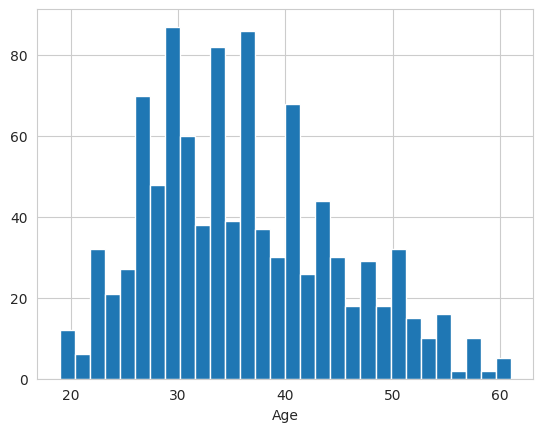

In [ ]:
sns.set_style('whitegrid')
ad_data['Age'].hist(bins=30)
plt.xlabel('Age')
plt.show()


**Create a jointplot showing Area Income versus Age.**

---



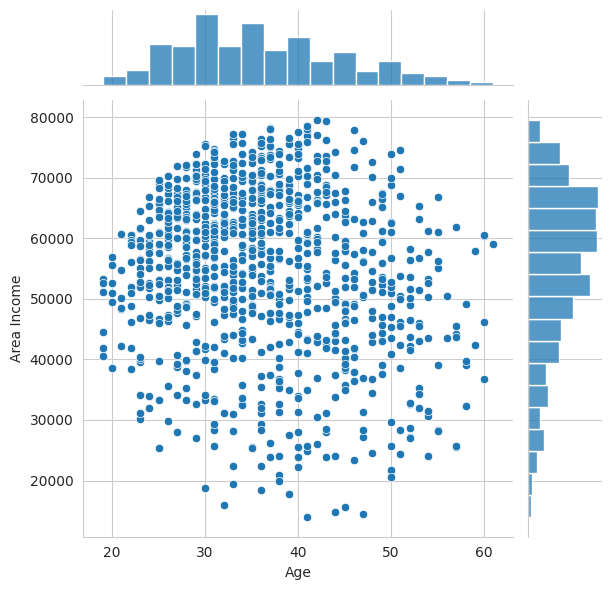

In [ ]:

sns.jointplot(x='Age',y='Area Income',data=ad_data)
plt.show()


**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**





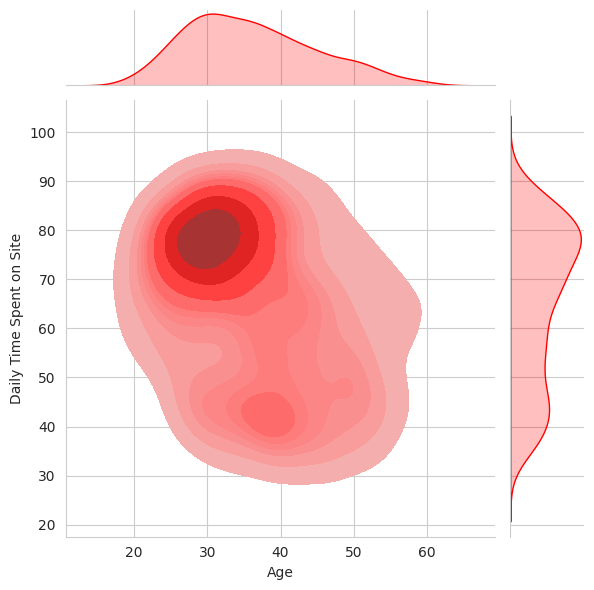

In [ ]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=ad_data, kind='kde', color='red', fill=True)
plt.show()


** Create a jointplot of 'Daily Time Spent on Site' vs 'Daily Internet Usage'**

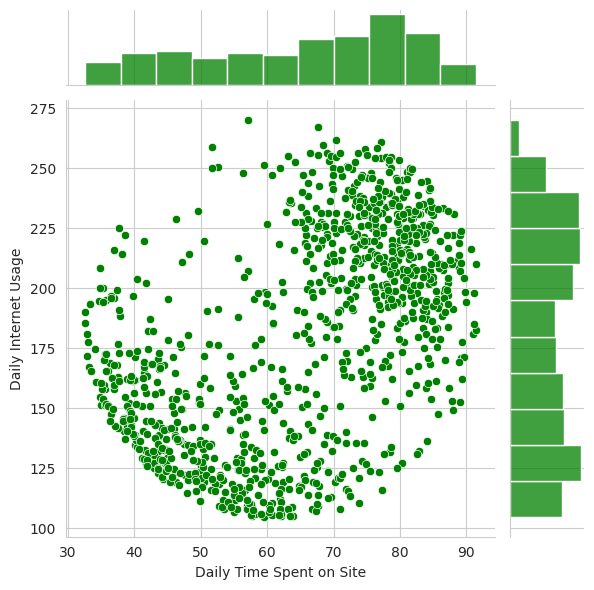

In [ ]:
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=ad_data, color='green')
plt.show()


** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

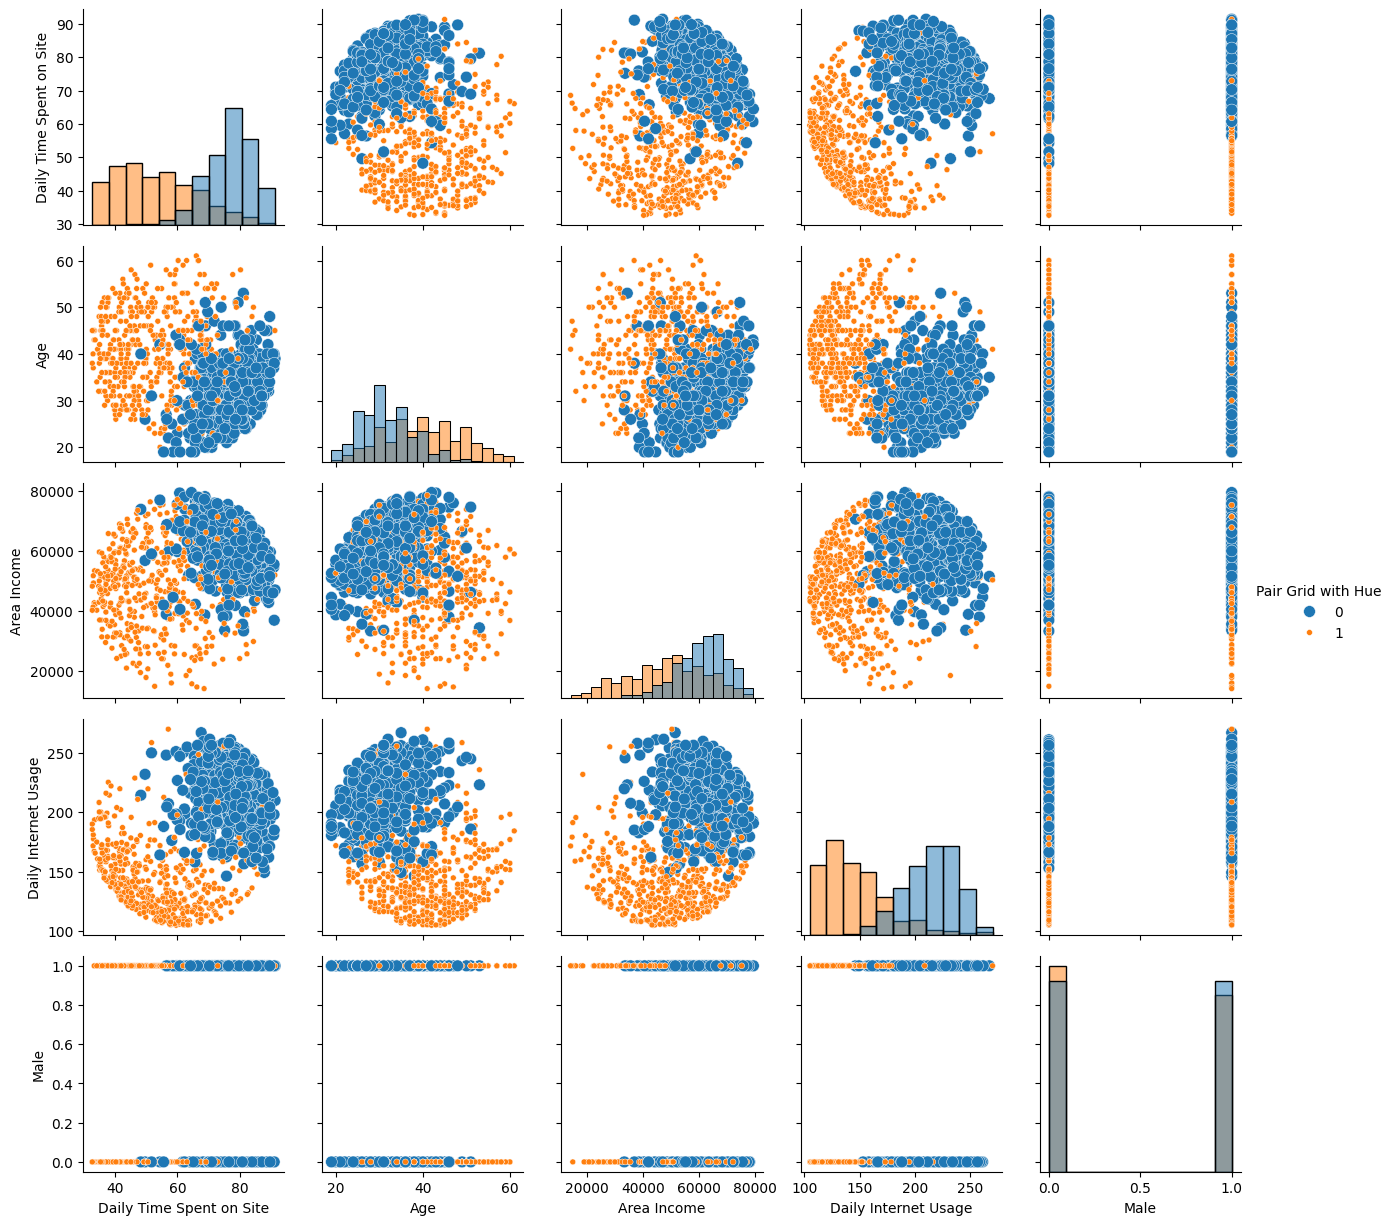

In [3]:
g = sns.PairGrid(ad_data, hue="Clicked on Ad")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot, size=ad_data["Clicked on Ad"])
g.add_legend(title="Pair Grid with Hue", adjust_subtitles=True)


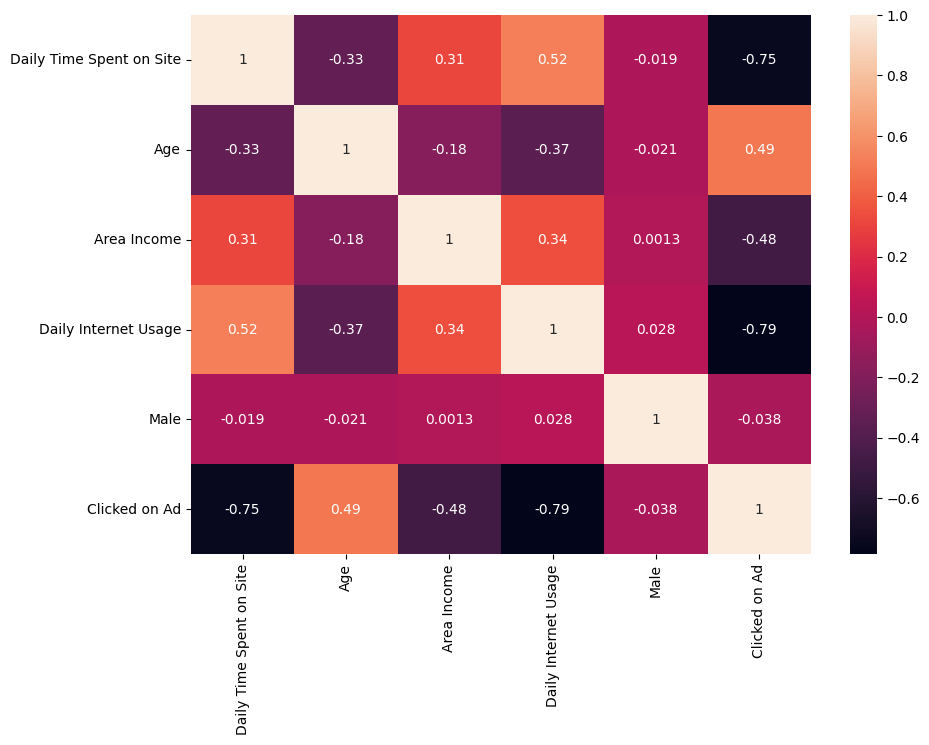

In [8]:
#co-relations

plt.figure(figsize=(10, 7))
numerical_ad_data = ad_data.select_dtypes(include=['number'])
sns.heatmap(numerical_ad_data.corr(), annot=True)
plt.show()

In [5]:
ad_data['Clicked on Ad'].value_counts()


,count
Clicked on Ad,
0,500
1,500


# Feature Engineering

In [ ]:

# Convert 'Timestamp' column to datetime objects
ad_data['Timestamp'] = pd.to_datetime(ad_data['Timestamp'])

# Extract features from 'Timestamp'
ad_data['Hour'] = ad_data['Timestamp'].dt.hour
ad_data['Dayofweek'] = ad_data['Timestamp'].dt.dayofweek

# Create interaction features
ad_data['TimeSpent_Age'] = ad_data['Daily Time Spent on Site'] * ad_data['Age']
ad_data['Income_InternetUsage'] = ad_data['Area Income'] * ad_data['Daily Internet Usage']

# Create categorical features from numerical features
ad_data['AgeGroup'] = pd.cut(ad_data['Age'], bins=[10, 20, 30, 40, 50, 60,70], labels=['10-20','20-30','30-40','40-50','50-60','60-70'])
ad_data['IncomeGroup'] = pd.cut(ad_data['Area Income'], bins=5, labels=False) # Discretize into 5 groups

# One-hot encode categorical features
# Check if the columns exist before applying get_dummies
columns_to_encode = ['Ad Topic Line', 'City', 'Country', 'AgeGroup', 'Male']
columns_to_encode = [col for col in columns_to_encode if col in ad_data.columns]  # Filter existing columns

ad_data = pd.get_dummies(ad_data, columns=columns_to_encode, drop_first=True) # Drop first column to avoid multicollinearity

# Drop original 'Timestamp' column
ad_data = ad_data.drop('Timestamp', axis=1)

# Print some of the newly engineered features to console
# Ensure you are printing existing columns
print(ad_data[['Hour', 'Dayofweek', 'TimeSpent_Age', 'Income_InternetUsage']].head()) # Changed to existing columns


   Hour  Dayofweek  TimeSpent_Age  Income_InternetUsage
0     0          6        2413.25          1.583504e+07
1     1          0        2487.13          1.326198e+07
2    20          6        1806.22          1.413937e+07
3     2          6        2150.35          1.347629e+07
4     3          4        2392.95          1.666810e+07


# Logistic Regression

Now it's time I do a train test split, and train my model!

I have chosen columns I would want to train on!

** Split the data into training set and testing set using train_test_split**

** Train and fit a logistic regression model on the training set.**


In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split


X = ad_data.drop(['Timestamp', 'Clicked on Ad', 'Ad Topic Line', 'Country', 'City'], axis=1)
y = ad_data['Clicked on Ad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# cat_columns = []
num_columns = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']


ct = make_column_transformer(
    (MinMaxScaler(), num_columns),
    (StandardScaler(), num_columns),
    remainder='passthrough'
)

X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)


# Predictions and Evaluations

** Predicting values for the testing data.**

** Genrating a classification report of my model **

In [14]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report  # Import necessary modules

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    '''
    print the accuracy score, classification report of the model
    '''
    if train:
        '''
        training performance
        '''
        pred = clf.predict(X_train)
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\n{classification_report(y_train, pred)}\n")

    else:
        '''
        test performance
        '''
        pred = clf.predict(X_test)
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\n{classification_report(y_test, pred)}\n")


lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 97.43%
_______________________________________________
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       354
           1       0.99      0.96      0.97       346

    accuracy                           0.97       700
   macro avg       0.97      0.97      0.97       700
weighted avg       0.97      0.97      0.97       700


Test Result:
Accuracy Score: 97.00%
_______________________________________________
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       146
           1       0.98      0.96      0.97       154

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300




# Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier


rf_clf = RandomForestClassifier(n_estimators=1000)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)


Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       354
           1       1.00      1.00      1.00       346

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700


Test Result:
Accuracy Score: 95.33%
_______________________________________________
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       146
           1       0.96      0.95      0.95       154

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300




# Deployment
## Deploy using joblib

In [19]:
# prompt: deploy the above using joblib both linear regression and random forest

from joblib import dump, load

# Save the trained models
dump(lr_clf, 'logistic_regression_model.joblib')
dump(rf_clf, 'random_forest_model.joblib')

# Save the column transformer
dump(ct, 'column_transformer.joblib')

# Load the models and column transformer (for demonstration purposes)
loaded_lr_clf = load('logistic_regression_model.joblib')
loaded_rf_clf = load('random_forest_model.joblib')
loaded_ct = load('column_transformer.joblib')




# Testing My Deployed Model by feeding in data ..

In [24]:
import pandas as pd
from joblib import load

# Load the saved models and column transformer
loaded_lr_clf = load('logistic_regression_model.joblib')
loaded_rf_clf = load('random_forest_model.joblib')
loaded_ct = load('column_transformer.joblib')

# Create a new DataFrame with a single sample (replace with your actual data)
# The column names must exactly match those in your training data BEFORE one-hot encoding
new_data = pd.DataFrame({
    'Daily Time Spent on Site': [68.95],
    'Age': [35],
    'Area Income': [61833.90],
    'Daily Internet Usage': [256.09],
    'Male': [0],
    # Add other features with appropriate values
    # ... other features ...
}, index=[0]) # Added index to ensure DataFrame structure

# Get the expected feature names from the ColumnTransformer BEFORE one-hot encoding
num_columns = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male'] # Original numerical columns
# Ensure all expected numerical features are present in new_data, filling missing with 0
for feature in num_columns:
    if feature not in new_data.columns:
        new_data[feature] = 0  # Fill missing columns with 0

# Transform the new data using the loaded column transformer
new_data_transformed = loaded_ct.transform(new_data)

# Make predictions using the loaded models
lr_prediction = loaded_lr_clf.predict(new_data_transformed)
rf_prediction = loaded_rf_clf.predict(new_data_transformed)

print("Logistic Regression Prediction:", lr_prediction)
print("Random Forest Prediction:", rf_prediction)

Logistic Regression Prediction: [0]
Random Forest Prediction: [0]



# Advertising Click Prediction

This project uses a fake advertising dataset to predict whether a user will click on an advertisement based on various user features.

## Data Description

The dataset contains the following features:

* **'Daily Time Spent on Site':** Consumer time on site in minutes
* **'Age':** Customer age in years
* **'Area Income':** Average income of the geographical area of the consumer
* **'Daily Internet Usage':** Average minutes a day the consumer is on the internet
* **'Ad Topic Line':** Headline of the advertisement
* **'City':** City of the consumer
* **'Male':** Whether or not the consumer is male (binary)
* **'Country':** Country of the consumer
* **'Timestamp':** Time at which the consumer clicked on the ad or closed the window
* **'Clicked on Ad':** 0 or 1 indicating clicking on the ad (target variable)

## Project Structure

1. **Data Loading and Exploration:**
   - Reads the `advertising.csv` file into a pandas DataFrame.
   - Performs initial data exploration using `head()`, `info()`, and `describe()`.
   - Visualizes data distributions using histograms, joint plots, and pair plots from seaborn.
   - Calculates and visualizes correlations between numerical features.


2. **Feature Engineering:**
    - Converts the 'Timestamp' column to datetime objects.
    - Extracts 'Hour' and 'Dayofweek' from 'Timestamp'.
    - Creates interaction features ('TimeSpent_Age', 'Income_InternetUsage').
    - Creates categorical features from numerical features ('AgeGroup', 'IncomeGroup').
    - One-hot encodes categorical features.
    - Removes the original 'Timestamp' column.

3. **Model Training:**
    - Splits the data into training and testing sets using `train_test_split`.
    - Scales numerical features using `MinMaxScaler` and `StandardScaler`.
    - Trains a Logistic Regression model and a RandomForestClassifier.
    - Evaluates model performance using accuracy score and classification report.

4. **Model Deployment:**
   - Saves the trained models (Logistic Regression and Random Forest) and the column transformer using `joblib`.

5. **Model Testing:**
    - Demonstrates how to load the saved model and column transformer.
    - Creates a new data sample and preprocesses it using the loaded column transformer.
    - Makes predictions using the loaded models.

## Usage

1.  **Run the notebook:** Execute the code cells sequentially.
2.  **Model Deployment:** The trained models are saved as `logistic_regression_model.joblib` and `random_forest_model.joblib`. The column transformer is saved as `column_transformer.joblib`.  You can load these using `joblib.load()`.
3.  **Prediction:** The script includes an example of loading the saved model and predicting the outcome for a new data point.

## Dependencies

*   pandas
*   numpy
*   seaborn
*   matplotlib
*   scikit-learn
*   joblib

To install dependencies: